<a href="https://colab.research.google.com/github/kmodi1428/ML_Assignment/blob/main/MLR_Toyota_corolla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfa

In [ ]:
# DATA PREPROCESSING

df= pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df= df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df

# considering variables which are mention in the problem ststement

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df_1= df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df_1

#renaming the columns

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df_1.isnull().sum()

#there are no null values


Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [ ]:
df_1=df_1.drop_duplicates().reset_index(drop=True)
df_1[df_1.duplicated()]

# all the duplicate values has been droped

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [ ]:
df_1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<Axes: >

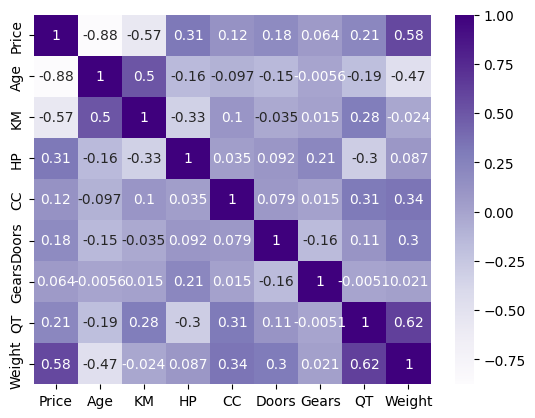

In [ ]:
sns.heatmap(df_1.corr(),annot=True,cmap=plt.cm.Purples)

# correlation matrix to check corr between variables visually

In [ ]:
# VIF calculation by using ols model

rsq_age= sfa.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=df_1).fit().rsquared
vif_age= 1/(1-rsq_age)
rsq_km= sfa.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df_1).fit().rsquared
vif_km= 1/(1-rsq_km)
rsq_hp= sfa.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=df_1).fit().rsquared
vif_hp= 1/(1-rsq_hp)
rsq_cc= sfa.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=df_1).fit().rsquared
vif_cc= 1/(1-rsq_cc)
rsq_doors= sfa.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=df_1).fit().rsquared
vif_doors= 1/(1-rsq_doors)
rsq_gears= sfa.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=df_1).fit().rsquared
vif_gears= 1/(1-rsq_gears)
rsq_qt= sfa.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=df_1).fit().rsquared
vif_qt= 1/(1-rsq_qt)
rsq_weight= sfa.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=df_1).fit().rsquared
vif_weight= 1/(1-rsq_weight)

k1= {'Features':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_weight]}
vif_dataframe= pd.DataFrame(k1)
vif_dataframe

# here we can see there are no dependent variables
# all the variables are below 10 then these are independent variables

,Features,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [ ]:
# MODELLING

from sklearn.metrics import r2_score

In [ ]:
model_1= sfa.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:17:54   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Standerdizing

def standardizing(vals):
    return (vals-vals.mean())/vals.std()

# using standerd scaler the data and checking the residuals

Text(0, 0.5, 'standardized resid')

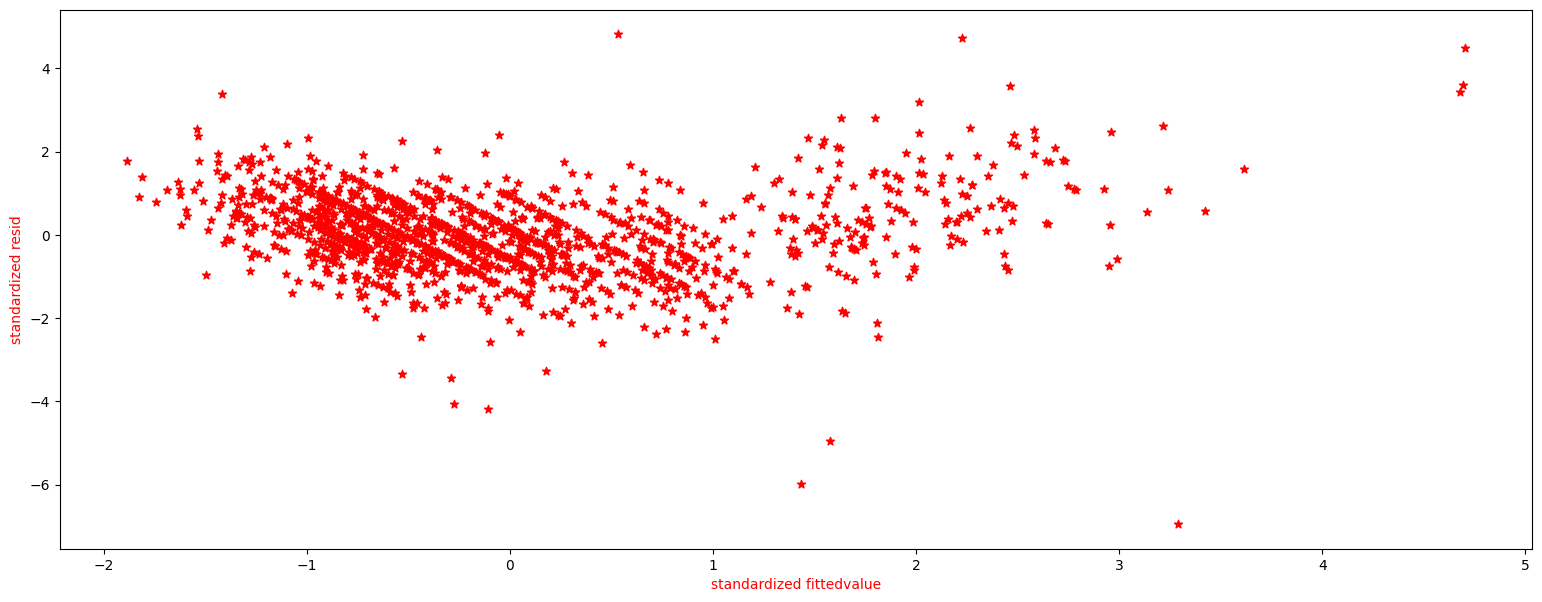

In [ ]:
plt.figure(figsize=(19,7))
plt.scatter(standardizing(model_1.fittedvalues),standardizing(model_1.resid),c ='red' , marker = '*')
plt.xlabel('standardized fittedvalue', c = 'red')
plt.ylabel('standardized resid', c = 'red')

Text(0.5, 1.0, 'Q-Q plot of residual')

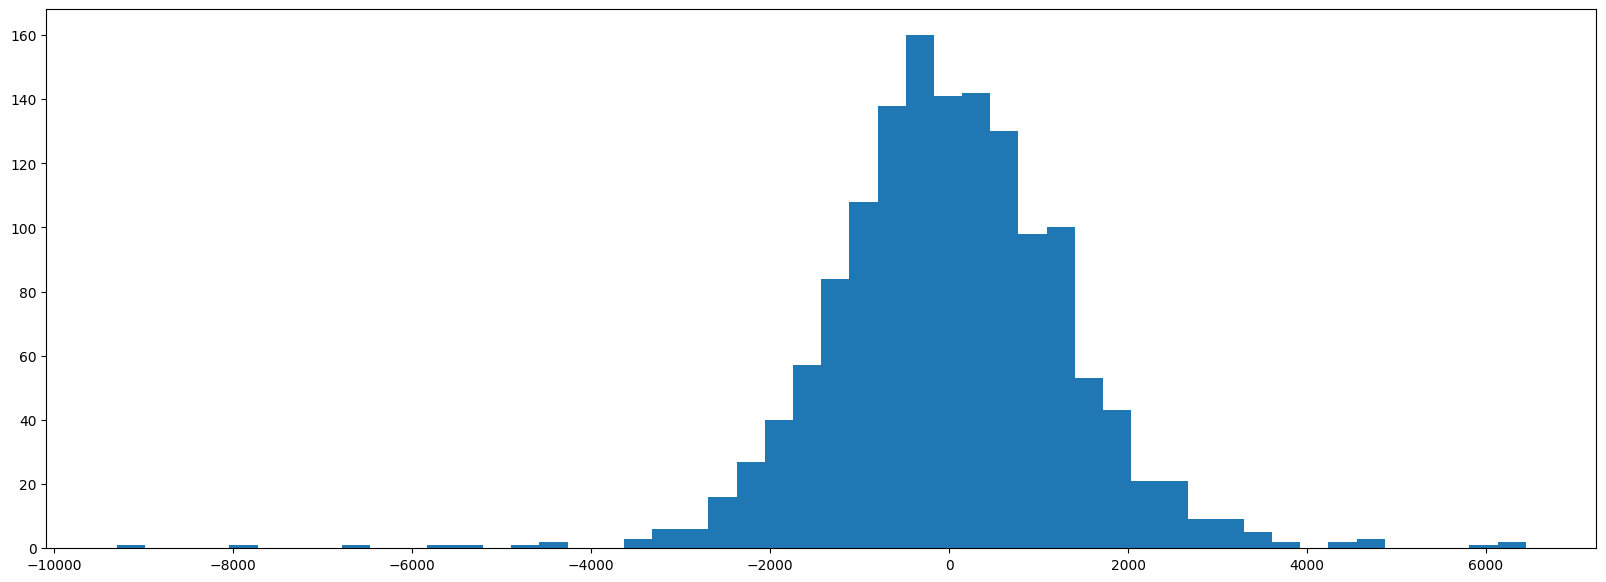

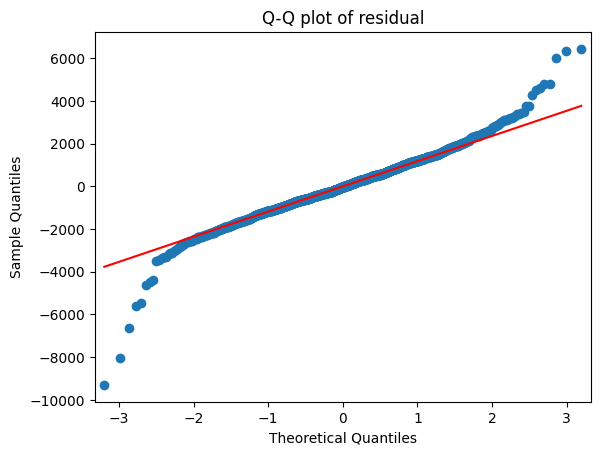

In [ ]:
#Q-Q plot to check the normality of the distribution

plt.figure(figsize=(20,7))
plt.hist(model_1.resid,bins=50)

import statsmodels.api as sm
qqplot= sm.qqplot(model_1.resid,line='q')
plt.title('Q-Q plot of residual')

In [ ]:
#checking the influencing vlaues or outliers

from statsmodels.graphics.regressionplots import influence_plot

influence_model= model_1.get_influence()
(c,_)= influence_model.cooks_distance

In [ ]:
k= 8
n= 1436
(3*k)/n

0.016713091922005572

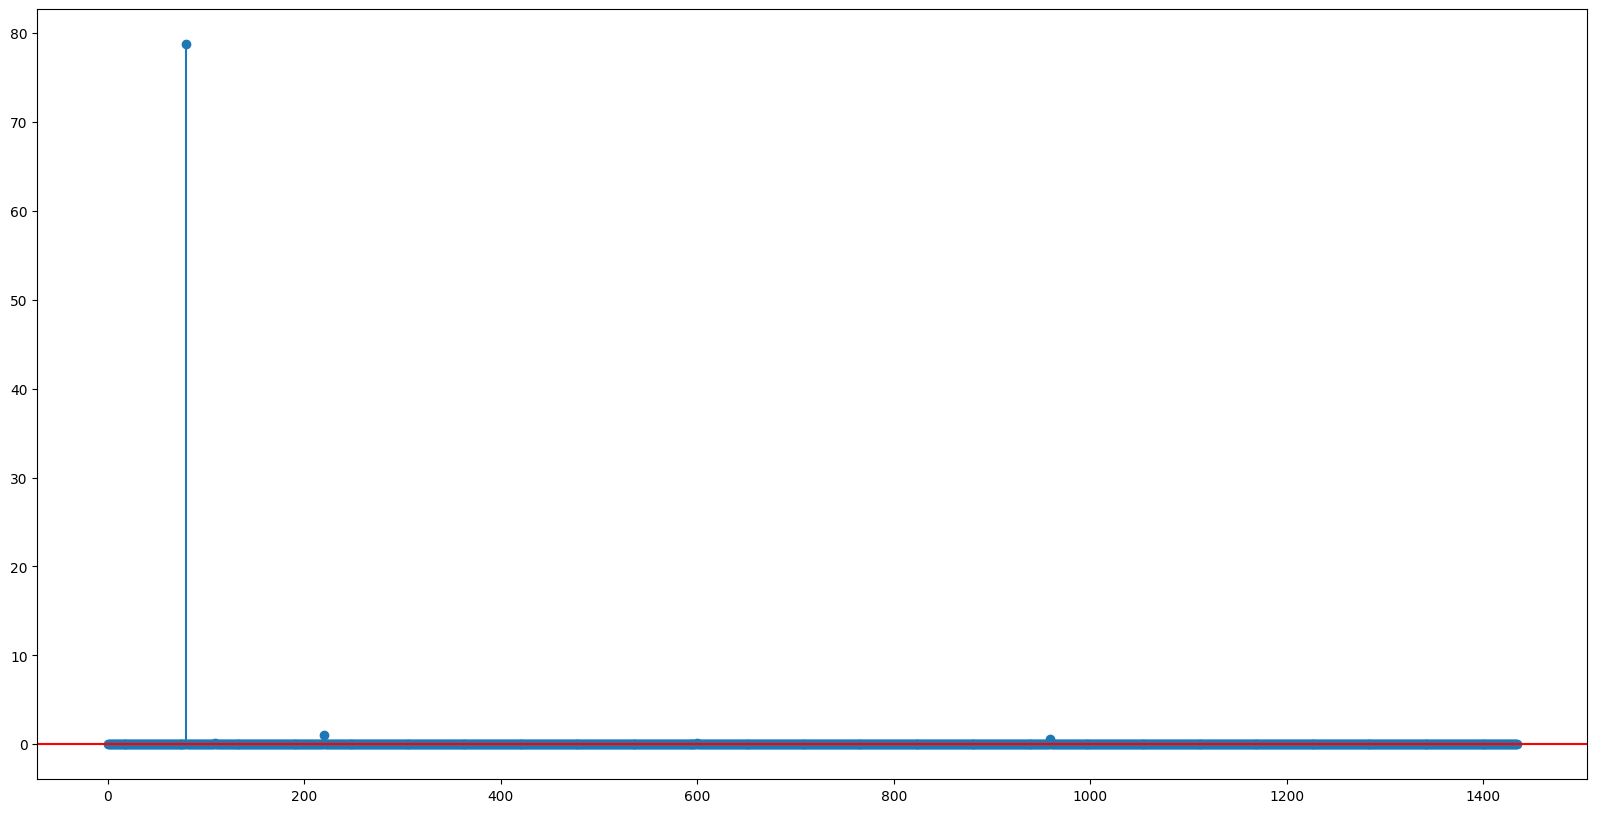

In [ ]:
plt.figure(figsize=(20, 10))
plt.stem(np.arange(len(df_1)), np.round(c, 3))
plt.axhline(y=0.016713091922005572, color='red')

In [ ]:
np.argmax(c),np.max(c)

(80, 78.72950582258932)

In [ ]:
np.where(c>0.016713091922005572)

(array([  14,   16,   49,   80,  109,  110,  111,  140,  190,  191,  220,
         401,  522,  600,  653,  959,  990, 1057]),)

In [ ]:
new_df= df_1
rows_to_drop = [14, 16, 49, 80, 109, 110, 111, 140, 190, 191, 220, 401, 522, 600, 653, 959, 990, 1057]
data = new_df.drop(index=rows_to_drop).reset_index(drop=True)
data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1412,7500,69,20544,86,1300,3,5,69,1025
1413,10845,72,19000,86,1300,3,5,69,1015
1414,8500,71,17016,86,1300,3,5,69,1015
1415,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
model_2= sfa.ols('Price~(np.log(Age)+np.log(KM)+np.log(HP)+np.log(CC)+np.log(Doors)+np.log(Gears)+np.log(QT)+np.log(Weight))+(np.sqrt(Age)+np.sqrt(KM)+np.sqrt(HP)+np.sqrt(CC)+np.sqrt(Doors)+np.sqrt(Gears)+np.sqrt(QT)+np.sqrt(Weight))',data=data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     798.0
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:23:05   Log-Likelihood:                -11898.
No. Observations:                1417   AIC:                         2.383e+04
Df Residuals:                    1400   BIC:                         2.392e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.13e+06   2.28e+05      4.960      0.000    6.83e+05    1.58e+06
np.log(Age)      -104.7966    338.897     -0.309      0.757    -769.598     560.005
np.log(KM)        395.2561     64.224      6.154      0.000     269.270     521.243
np.log(HP)      -1.199e+04   3904.962     -3.070      0.002   -1.96e+04   -4326.313
np.log(CC)      -5446.3049   1.98e+04     -0.275      0.784   -4.43e+04    3.34e+04
np.log(Doors)     1.24e+04   5421.455      2.287      0.022    1763.564     2.3e+04
np.log(Gears)   -9442.8614   1.43e+04     -0.662      0.508   -3.74e+04    1.85e+04
np.log(QT)       1332.8825    379.993      3.508      0.000     587.466    2078.299
np.log(Weight)   -2.21e+05   5.53e+04     -3.999      0.000   -3.29e+05   -1.13e+05
np.sqrt(Age)    -1515.4786    111.761    -13.560      0.000   -1734.716   -1296.241
np.sqrt(KM)       -12.1440      0.837    -14.517      0.000     -13.785     -10.503
np.sqrt(HP)      2965.7680    739.383      4.011      0.000    1515.350    4416.186
np.sqrt(CC)       105.1508   1006.097      0.105      0.917   -1868.470    2078.772
np.sqrt(Doors)  -1.271e+04   5530.719     -2.298      0.022   -2.36e+04   -1858.996
np.sqrt(Gears)   1.008e+04   1.26e+04      0.802      0.423   -1.46e+04    3.47e+04
np.sqrt(QT)      -300.6979    102.696     -2.928      0.003    -502.152     -99.244
np.sqrt(Weight)  1.504e+04   3334.372      4.510      0.000    8497.709    2.16e+04
==============================================================================
Omnibus:                       35.019   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.568
Skew:                           0.220   Prob(JB):                     8.58e-13
Kurtosis:                       3.864   Cond. No.                     2.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'model_2 Q-Q plot')

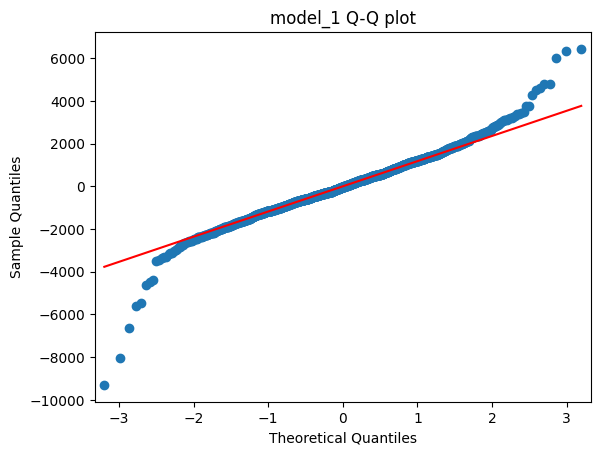

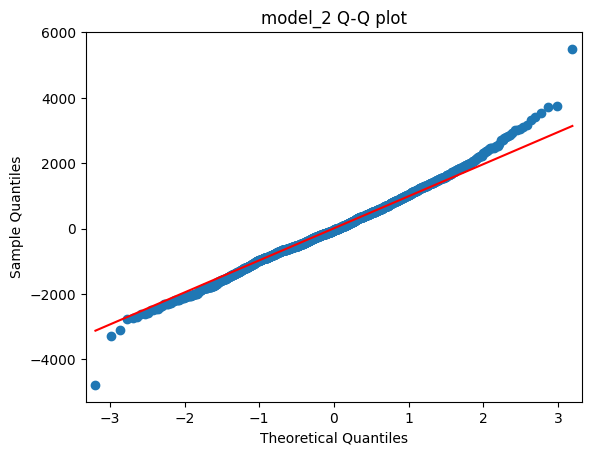

In [ ]:
#Q-Q plot for model1 and model2

qqplot= sm.qqplot(model_1.resid,line='q')
plt.title('model_1 Q-Q plot')

qqplot=sm.qqplot(model_2.resid,line='q')
plt.title('model_2 Q-Q plot')

In [ ]:
predicted= pd.DataFrame()
predicted['Price']= data['Price']
predicted['Predicted_Price']= model_2.predict()
predicted

,Price,Predicted_Price
0,13500,16000.035865
1,13750,15526.499539
2,13950,15944.350783
3,14950,15507.899070
4,13750,15264.384704
...,...,...
1412,7500,9313.271768
1413,10845,8885.766135
1414,8500,9023.059946
1415,7250,9117.124438


In [ ]:
actual =[data['Price']]
predict =[predicted['Predicted_Price']]
error= [x-y for x, y in zip(actual, predict)]
error

[0      -2500.035865
 1      -1776.499539
 2      -1994.350783
 3       -557.899070
 4      -1514.384704
            ...     
 1412   -1813.271768
 1413    1959.233865
 1414    -523.059946
 1415   -1867.124438
 1416    -934.980480
 Length: 1417, dtype: float64]

Text(0, 0.5, 'error')

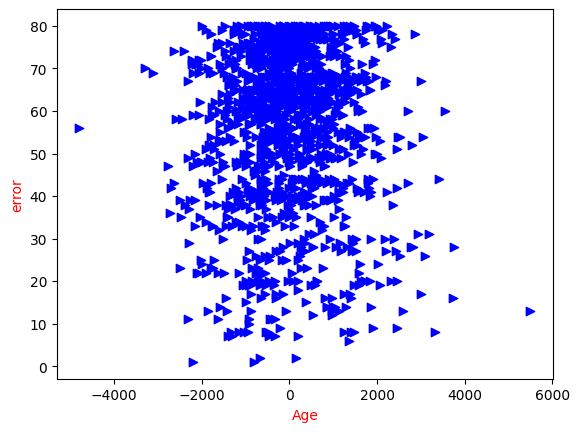

In [ ]:
plt.scatter(error,data['Age'] , marker='>', c = 'Blue')
plt.xlabel('Age',c='r')
plt.ylabel('error',c='r')